# Code Python - Electre Tri 

## Introduction to the project

The company at the origin of the request is the social landlord 3F, part of the national group Action Logement. Its request concerns the renovation of three of its housing buildings located in the Lyon region. These buildings having been built in the years 2014, the company thus considered necessary to carry out renovation works for the whole of these 3 buildings. 

The company has found it difficult in the past to find out how to renovate a building in view regarding the different aspects that come into play. For example, when looking at the minimum energy loss between primary and final energy, gas appears to be the most interesting form of energy. However, when looking at the environmental impact of this form of energy, gas is badly ranked. Thus, they wish to take into account several aspects of energy renovation in this project.  

Since several options of renovation are possible and the decision is based on multiple criteria, it has been chosen that a multi-criteria analysis should be carried out.

## Electre Tri as a multi-criteria analysis 

### Electre TRI method

The Electre Tri method is the multi-criteria analysis that is selected for the project. This method thus aims to sort all the alternatives in predefined categories. 
In its process, the input data for each item is compared to reference profiles that define the categories boundaries. This allows preference relationships to be established between the alternatives and the reference profiles. It can then be determined whether alternative A is "preferred" or "not preferred" to reference profile B.
This method results in an optimistic and pessimistic sorting of the alternatives. 


Electre Tri has many advantages. First of all, it allows, as previously defined, to compare the alternatives to profiles and to determine whether or not they belong to categories. Thus, it allows to evaluate the performance of a single alternative independently of the others. The analysis is therefore easily replicable by adding, deleting and modifying some alternatives. 
Also, this method includes thresholds, that allows situations of incomparability . This is crucial since it bypasses the compensation process. Indeed, it prevents a very poor performance in one criterion from being compensated by a very good performance in another criterion. 

### Electre TRI applied to the renovation decision making process

#### Input data

##### Criteria

First of all, the method needs input data to be integrated.
It can be broken down into two parts. On the one hand, the criteria are to be defined. According to Roy, B. [\cite{DefCriteria}], a criterion is a "tool" that allows to evaluate an action by a specific "point of view". Since these criteria will allow us to establish preference relations between many alternatives, it quality of construction is crucial. Also it is important that all the actors adhere to the choice of criteria and understand what each criterion represents, its precise definition and its evaluation method. [\cite{BuildingCriteria}]

- Their units
- Their weights

Criteria should be diversified, precise but not redundant to avoid assessing the same element twice. Thus, the assessment methods for each of the criteria should be precisely described so that the same data is not used to assess different criteria. 
 In order to cover all aspects of the project, 4 categories of criteria were defined: economic, social, technical and environmental. Then in each of these categories, several criteria are defined. For this project, 16 criteria are finally defined.

 ##### Scenarios

In parallel, in order to compare the different alternatives we have, it is necessary to be able to evaluate them. Each alternative should be evaluated regarding each criterion previously established. The evaluation of the performance $a$ of the alternative $i$ regarding the criterion $j$ will be noted $u_j(a_i)$.
In the Electre Tri method all these evaluations are grouped in a matrix called the "Performance Matrix". It is made as follow : each column correspond to an alternative and each line to a criterion. \\
\newline

The method should show which type of renovation best fits the building and the company's objectives. Thus, the actions to be compared should represent the different renovation possibilities that exist and the method should give the answer to their questions.

Firstly, the energy renovation of a building affects several areas and in each of these areas there are several alternatives. Seven areas have been identified.
For each of these areas, different alternatives are developed to obtain a total of 24 basic renovation actions (\ref{tab:ElementariesActions}). 

The different alternatives that are compared and classified are the scenarios. They are made up of coherent elementary actions that can be carried out together. Thus, families of scenarios are formed according to the different possible alternatives in each field. Thus, there are 28 renovation solutions identified in total with 7 groups, first renovation solution being the one where no changes are made (\ref{tab:Scenarios}).

It is important to note that a criterion can have a direction of preference that can be either increasing or decreasing. [\cite{GuideElectre}]
In a case of a criterion with an increasing preference direction, the higher the evaluation of the alternative on this criterion $u_j(a_i)$, the better the alternative performs on this criterion. Conversely, for a criterion with a decreasing performance direction, the lower the evaluation of the alternative on this criterion $u_j(a_i)$, the lower the performance of this alternative on this criterion. 
In order to unify the calculations and not to have to differentiate between the two cases described above, the performance values in the criteria with a decreasing preference direction will be multiplied by "-1". Thus, these criteria will also get an increasing performance direction. 

To sum up, in this project 28 scenarios will be evaluated thanks to 16 criteria. 

#### Parameters 



In [266]:
import csv
import pandas as pd
import numpy as np
from numpy import random, vstack, empty
import math
import matplotlib.pyplot as plt


### Import of data from csv file as a Pandas Dataframe

The input of the whole analysis is a `csv.file` made of 16 lines and 39 columns.

The 16 lines correponds to 16 criteria defined earlier. 
The indices of the lines are therefore the names of the criteria: <br>
`g1.1, g1.2, g1.3, g1.4, g1.5, g2.1, g2.2, g2.3, g2.4, g3.1, g3.2, g3.3, g3.4, g4.1, g4.2, g4.3, g4.4, g5.1, g5.2, g5.3`.

The columns contain the following informations : 
- The **mean value of the performance** of each scenario regarding each criteria (columns 0 to 27) <br>
Names of the columns : `'S1.1','S1.2','S1.3','S1.4','S2.1','S2.2','S2.3','S2.4','S3.1','S3.2','S3.3','S3.4','S4.1',`
`'S4.2','S4.3','S4.4','S5.1','S5.2','S5.3','S5.4','S6.1','S6.2','S6.3','S6.4','S7.1','S7.2',`
`'S7.3','S7.4'`
- The **weight** of each criteria (column 28) <br>
Name of the column : `Weights`
- The **variance** of each criteria (column 29) <br>
Name of the column : `Var`
- The **6 reference profiles** : $b0, b1, b2, b3, b4$ and $b5$ (columns 30 to 35) <br>
Names of the columns : `b0`, `b1`,`b2`, `b3`, `b4` and `b5`
- The **3 thresholds** : $q$ (the indifference threshold), $p$ (the preference threshold), $v$ (the veto threshold) (columns 36 to 38) <br>
Names of the columns : `q`, `p` and `v`


It is imported as a dataframe `d`.<br>
Two others parameters are also defined : 
- `λ` : the **cut-off threshold**
- `repet` : the **number of repetition** of the Electre Tri method desired


In [267]:
d = pd.read_csv('Input_data_0_4.csv')
λ = 0.75
repet = 1000

### Monte Carlo Function

#### Hypothesis or research ###


#### How does it works ###
Since we study 28 scenarios according to 16 criteria, compute all the possible combinations of performance values would not be feasible. To have more robust results, our hypothesis is to use the **Monte Carlo method** to obtain data sets from distributions and use those data sets in the Electre Tri procedure. 

Monte-Carlo simulation is used in complex systems in order to estimate some operations by using random sample and statistical modeling. 
1. Pick a value from Probability Distribution Functions
2. Run the calculation multiple times: Electre Tri in our case
3. Obtain a set of results to be analyzed 

The first step involve to be given Probability Distribution Functions as inputs. For our study, all the values will be represented as normal distributions. To descrive these distributions 2 parameters are needed : 
- the mean value : `m`
- the variance : `variance`

These values are given in the `d` DataFrame given as input of the code. 

The following function allows to :
1. Thanks to the variance and mean value for each performance : create the Normal Distribution
2. Pick a random value in each of it
3. Return a DataFrame also called `d` with the random values picked 

*The DataFrame returned will also contain all the parameters initially present in the `d` DataFrame.*

In [268]:
def MCarlo(d):
    variance = d['VAR'].values
    m = d.iloc[:, 0:28].values # for each scenario : columns 0 to 27 
    v = np.abs(m * variance[:, np.newaxis]) # calculation of the variance v 
    perf = np.random.normal(m, v) # pick a random value in th normal distribution with variance : v, mean : m 
    d.iloc[:, 0:28] = perf 
    return d


### Partial concordance

The partial concordance refers to the degree of concordance, i.e. agreement between the evaluations of pairs of alternatives and reference profiles.In other words, it evaluates how well each option performs relative to the others with respect to the set of criteria. 

This function take as input the `d` DataFrame containig all the performances as well as all the others parameters and input of the method, but only the performances, the reference profiles, and the thresholds will be used.

The objective is to calculate, regarding each criteria $j$ the concordance between each pair of alternative $a_i$ and reference profiles $b_k$ and in both ways: 
- The concordance $C_j(a_i,b_k)$
- The concordance $C_j(b_k,a_i)$ <br>

*for $i$ the scenarios, $k$ the reference profiles and $j$ the criteria*

The following schema shows how the value of the corcordance is determined : 

<center>
<figure>
  <img src="concordance.jpg" width="50%" height="50%">
</figure>
</center>

*with : <br>*
- *$u_j(a_i)$ : value of the performance of the scenario $i$ in the criterion $j$*
- *$u_j(b_k)$ : value of the reference profile $k$ in the criterion $j$*

The difference between the performance of an alternative $u_j(a_i)$ and the performance of a reference profile $u_j(b_k)$ regarding the criterion $j$ is calculated. This difference is then compared to the three thresholds $q_j, p_j, v_j$, respectively the indifference threshold, the preference threshold and the veto threshold. <br>

It can be therefore interpreted as follow : <br>
If the difference is lower than the indifference threshold $q_j$, the partial concordance will be equal to 1 since it corresponds to the acceptance of the assertion "$a_i$ is at least as good as $b_k$". 
On the other hand, if this difference is higher than the preference threshold $p_j$, the partial concordance would be equal to zero meaning that the assertion "$a_i$ is at least as good as $b_k$" is not concordant.

Thus, here is how the two types of concordance can be calculated in the function: <br>
<center>

$C_j(a_i,b_k) = u_j(a_i)-u_j(b_j)+p_j/p_j-q_j$<br>
$C_j(b_k,a_i) = u_j(b_j)-u_j(a_i)+p_j/p_j-q_j$<br>

</center>

*with : <br>*
- *$u_j(a_i)$ : value of the performance of the scenario $i$ in the criterion $j$*
- *$u_j(b_k)$ : value of the reference profile $k$ in the criterion $j$*
- *$p_j$ : the preference threshold of the criterion $j$* 
- *$q_j$ : the indiference threshold of the criterion $j$*

If the value of the concordance is higher than one it is replaced by `1`, and if it is smaller than zero it is replaced by `0`. 

Finally, the function returns two DataFrames : 
- `dconca` : The concordance between the performances and the reference profiles $C_k(a_i,b_j)$
- `dconcb` : The concordance between the reference profiles and the performances $C_k(b_j,a_i)$


In [269]:
def conce(d):
    new_df = pd.DataFrame() #DataFrame that will contain Cj(ai,bk)
    new_df2 = pd.DataFrame() #DataFrame that will contain Cj(bk,ai)
    for sc in d.iloc[:, 0:28]: # for each scenario : columns 0 to 27
        for pr in d.iloc[:, 30:36]: # for each reference profile : columns 30 to 35
            alpha = (d[sc]-d[pr]+d[d.columns[37]])/(d[d.columns[37]]-d[d.columns[36]]) # Cj(ai,bk) calculation
            beta = (d[pr]-d[sc]+d[d.columns[37]])/(d[d.columns[37]]-d[d.columns[36]]) # Cj(bk,ai) calculation
            new_df = pd.concat([new_df, alpha], axis=1, ignore_index=True)
            new_df2 = pd.concat([new_df2, beta], axis=1, ignore_index=True)
    # replace the negative values by zero and the one higher than one by one in both DataFrames
    new_df[new_df<0]=0
    new_df[new_df>1]=1
    new_df2[new_df2<0]=0
    new_df2[new_df2>1]=1
    return new_df, new_df2

### Discordance

The discordance matrix is a matrix that is used to represent the degree of discordance between pairs of alternatives and reference profiles. It is typically constructed by comparing the values of each alternative on each criterion, and determining whether the difference between the values is significant enough to cause discordance. 

This function take as input the `d` DataFrame containig all the performances as well as all the others parameters and input of the method, but only the performances, the reference profiles, and the thresholds will be used.

The objective is to calculate, regarding each criterion $j$, the discordance between each pair of alternative $a_i$ and reference profiles $b_k$ and in both ways: 
- The discordance $D_j(a_i,b_k)$
- The discordance $D_j(b_k,a_i)$ <br>
*for $i$ the scenarios, $k$ the reference profiles and $j$ the criteria*

The following schema shows how the value of the discordance is determined : 

<center>
<figure>
  <img src="discordance.jpg" width="50%" height="50%">
</figure>
</center>

It can be interpreted as follow : <br>
If the difference is lower than the indifference threshold $q_j$, the partial concordance will be equal to 1 since it corresponds to the acceptance of the assertion "$a_i$ is at least as good as $b_k$". 
On the other hand, if this difference is higher than the preference threshold $p_j$, the partial concordance would be equal to zero meaning that the assertion "$a_i$ is at least as good as $b_k$" is not concordant. 


Thus, here is how the two types of discordance can be calculated in the function: <br>
<center>

$D_j(a_i,b_k) = u_j(b_k)-u_j(a_i)-p_j/v_j-p_j$<br>
$D_j(b_k,a_i) = u_j(a_i)-u_j(b_k)-p_j/v_j-p_j$<br>

</center>

*with : <br>*
- *$u_j(a_i)$ : value of the performance of the scenario $i$ in the criterion $j$*
- *$u_j(b_k)$ : value of the reference profile $k$ in the criterion $j$*
- *$p_j$ : the preference threshold of the criterion $j$* 
- *$q_j$ : the indiference threshold of the criterion $j$*

If the value is higher than one it is replaced by `1`, and if it is smaller dans zero it is replaced by `0`. 

The function takes as input the `d` Dataframe.
Finally, the function returns two DataFrames : 
- `ddiscoa` : The discordance between the performances and the reference profiles $D_j(a_i,b_k)$
- `ddiscob` : The discordance between the reference profiles and the performances $D_j(b_k,a_i)$

In [270]:
def disco(d):
    new_df = pd.DataFrame() # DataFrame that will contain Dj(ai,bk)
    new_df2 = pd.DataFrame() # DataFrame that will contain Dj(bk,ai)
    for sc in d.iloc[:, 0:28]:  # for each scenario : columns 0 to 27
        for pr in d.iloc[:, 30:36]: # for each reference profile : columns 30 to 35
            alpha = (d[pr]-d[sc]-d[d.columns[37]])/(d[d.columns[38]]-d[d.columns[37]]) # Dj(ai,bk) calculation
            beta = (d[sc]-d[pr]-d[d.columns[37]])/(d[d.columns[38]]-d[d.columns[37]]) # Dj(bk,ai) calculation
            new_df = pd.concat([new_df, alpha], axis=1, ignore_index=True)
            new_df2 = pd.concat([new_df2, beta], axis=1, ignore_index=True)
     # replace the negative values by zero and the one higher than one by one in both DataFrames
    new_df[new_df<0]=0
    new_df[new_df>1]=1
    new_df2[new_df2<0]=0
    new_df2[new_df2>1]=1
    return new_df, new_df2

### Global concordance

The aim of this step is to calculate the global concordance of each scenario regarding each criterion. In other words, it expresses to which extend the performances of $a_i$ and $b_k$ regarding all criteria are concordant with the assertion ”$a_i$ outranks $b_k$".<br>
It takes as input the concordance matrix and the weights for each criteria. <br>

The function takes as input  :
- the weights of each criterion, located in the `d` DataFrame, in the column 28 named `Weights`
- the concordance matrix, separated into 2 DataFrames previously : `dconca` and `dconcb`. 

The objective is, for each scenario to calculate the following global concordance : 

<center>

$C(a_i,b_k) = \frac {\sum_{j} C_j(a_i,b_k) * w_j}{\sum_{j} w_j}$

</center>

*with i the scenarios, j the criteria and k the reference profiles*

Since This function has to be used twice :
- Once taking as input `dconca` and returning as output `dgconca` : $C(a_i,b_k)$
- Once taking as input `dconcb` and returning as output `dgconcb` : $C(b_k,a_i)$








In [271]:
def global_conc(d,dconc1):
    new_df = pd.DataFrame(index=['b0', 'b1', 'b2', 'b3', 'b4', 'b5'], columns=['S1.1','S1.2','S1.3','S1.4','S2.1','S2.2','S2.3','S2.4','S3.1','S3.2','S3.3','S3.4','S4.1','S4.2','S4.3','S4.4','S5.1','S5.2','S5.3','S5.4','S6.1','S6.2','S6.3','S6.4','S7.1','S7.2','S7.3','S7.4']) 
    i = 0
    for j in range(0, len(dconc1.columns),6): # for each scenario : one line out of 6 
        # C(ai,bk) for the scenario for each reference profile
        a = sum(dconc1[j]*d[d.columns[28]])/sum(d[d.columns[28]]) 
        b = sum(dconc1[j+1]*d[d.columns[28]])/sum(d[d.columns[28]])  
        c = sum(dconc1[j+2]*d[d.columns[28]])/sum(d[d.columns[28]]) 
        dr = sum(dconc1[j+3]*d[d.columns[28]])/sum(d[d.columns[28]])  
        e = sum(dconc1[j+4]*d[d.columns[28]])/sum(d[d.columns[28]]) 
        f = sum(dconc1[j+5]*d[d.columns[28]])/sum(d[d.columns[28]]) 
        th = [a,b,c,dr,e,f]
        new_df[new_df.columns[i]]= th # add the global concordance as a new column
        i = i+1
    return new_df

### Degree of credibility

The degree of credibility evaluates if the assumption that a scenario outperforms a profile is plausible and to which extent "$a_i$ outranks $b_k$", resulting in a value between 0 (the assumption is not plausible) and 1 (the assumption is very plausible).
The degree of credibility evaluating the outranking of the alternative $a_i$ over the reference profile $b_k$ is noted : $ \delta(a_i,b_k)$ (and conversely the degree of credibility evaluating the outranking of the reference profile $b_k$ over the alternative $a_i$ is noted $ \delta(b_k,a_i)$).

The degree of credibility is calculated thanks to :
- the global concordance of each scenario with each reference profile $C(a_i,b_k)$ named `dgconca`
- the discordance matrix, separated in two DataFrames `ddiscoa` containing the discordance  $D_j(a_i,b_k)$ and `ddiscob`containing the discordance  $D_j(b_k,a_i)$.

The objective is, for each scenario, to follow these steps : 

If for all the criteria $j$,   $D_j(a_i,b_k) \le C(a_i,b_k)$:
<center>

$ \delta(a_i,b_k) = C(a_i,b_k) $

</center>

Else : 

<center>

$ \delta(a_i,b_k) = C(a_i,b_k) * \prod_{j \in J } \frac{(1-D_j(a_i,b_k))}{(1-C(a_i,b_k))} $

</center>

*With :*
- *J : all the criteria for whom the discordance is lower than the concordance : $D_j(a_i,b_k) \ge C(a_i,b_k)$*
- *$C(a_i,b_k)$ : the global concordance of the alternitive $a_i$ with the reference profile $b_k$*
- *$D(a_i,b_k)$ : the global discordance of the alternitive $a_i$ with the reference profile $b_k$*

In order to better understand the steps of this calculation the degree of credibility is calculated as follows: 
-  if within the criteria, none of them is discordant, the degree of credibility is equal to the global concordance : $ \delta(a_i,b_k) = C(a_i,b_k)  $ 
- if one of them is discordant (equal to one), that means that it is above the veto threshold, the degree of credibility if equal to zero : $ \delta(a_i,b_k) = 0$
- finally, if some criteria are lower than $1$ but higher that the concordance, the degree of credibility is lower by these effects, the calculation is therefore developed in the formula above.

In other words, the degree of credibility is the global concordance weakened by the eventual veto effects that can be found in the partial discordance. 

Since the degree of credibility must be calculated comparing the performance with the reference profiles but also comparing the reference profiles with the performance, thus the following function should be run 2 times : 
- Once considering the comparaison of performance with reference profiles $(a_i,b_k)$
    - input : `dgconca` : the global performance  $C(a_i,b_k) $ and `ddiscoa` : the discordance :  $D_j(a_i,b_k) $
    - output : `dcreda`: the credibility $ \delta(a_i,b_k)$ <br>
    

- Once considering the comparaison of reference profiles with performances $(b_k,a_i)$
    - input : `dgconcb` : the global performance  $C(b_k,a_i) $ and `ddiscoa` : the discordance :  $D_j(b_k,a_i) $
    - output : `dcredb` the credibility $ \delta(b_k,a_i)$

In [272]:
def credibility(dgconc, ddisc):
    #initialization
    dcred = pd.DataFrame(index=['b0', 'b1', 'b2', 'b3', 'b4', 'b5'], columns=['S1.1','S1.2','S1.3','S1.4','S2.1','S2.2','S2.3','S2.4','S3.1','S3.2','S3.3','S3.4','S4.1','S4.2','S4.3','S4.4','S5.1','S5.2','S5.3','S5.4','S6.1','S6.2','S6.3','S6.4','S7.1','S7.2','S7.3','S7.4']) 
    for j in range(0, len(ddisc.columns), 6):
        sc = int(j/6)
        degree = [0, 0, 0, 0, 0, 0]
        for pr in range(len(dcred.index)):
            #verification if all Dj < C
            verif = sum(ddisc[j+pr][c] > dgconc[dgconc.columns[sc]][pr] for c in ddisc.index)
            #case 1
            if verif == 0:
                degree[pr] = dgconc[dgconc.columns[sc]][pr]
            #case 2
            else:
                degree[pr] = (((1-ddisc[j+pr][ddisc[j+pr] > dgconc[dgconc.columns[sc]][pr]])/(1-dgconc[dgconc.columns[sc]][pr])).prod())*dgconc[dgconc.columns[sc]][pr]
        dcred[dcred.columns[sc]] = degree
    return dcred

### Over Ranking

The objective of this step is to establish preference relationships between performance and reference profiles. 
These relationships are established than the degree  of credibility determined just before and thanks to the cutting threshold $\lambda$. 
The value of this cutting threshold can vary, and it value will be discussed later. 

There are 4 types of relationships that can be established between each $a_i$ and each $b_k$
- $a_i$  `I`  $b_k$ : $a_i$  is Indifferent to  $b_k$ 
- $a_i$  `>`  $b_k$ : $a_i$  is preferred to  $b_k$ 
- $a_i$  `<`  $b_k$ : $a_i$  is not preferred to  $b_k$ 
- $a_i$  `R`  $b_k$ : $a_i$  incomparable to $b_k$ 

This is how this these relationship are determined : 


<center>
<figure>
  <img src="over_ranking_relations.jpg" width="50%" height="50%">
  <figcaption>Preference relationships</figcaption>
</figure>
</center>

The function will return a Dataframe `dranking` containing all these relations between performance and reference profiles.



In [273]:
def over_ranking_relations(creda, credb, λ):
    #initialization
    new_df = pd.DataFrame(index=['b0', 'b1', 'b2', 'b3', 'b4', 'b5'], columns=['S1.1','S1.2','S1.3','S1.4','S2.1','S2.2','S2.3','S2.4','S3.1','S3.2','S3.3','S3.4','S4.1','S4.2','S4.3','S4.4','S5.1','S5.2','S5.3','S5.4','S6.1','S6.2','S6.3','S6.4','S7.1','S7.2','S7.3','S7.4']) 
    classementa = creda.apply(lambda x: x-λ)
    classementb = credb.apply(lambda x: x-λ)
    #1 if outperformance (S), 0 if not 
    classementa[classementa > 0] = 1  
    classementa[classementa < 0] = 0  
    classementb[classementb > 0] = 1
    classementb[classementb < 0] = 0
    mask = (classementa == classementb) & (classementa == 1)
    new_df = new_df.mask(mask, "I")
    mask = (classementa == classementb) & (classementa == 0)
    new_df = new_df.mask(mask, "R")
    mask = (classementb != 0) & (classementa == 0)
    new_df = new_df.mask(mask, "<")
    mask = (classementa != 0) & (classementb == 0)
    new_df = new_df.mask(mask, ">")
    return new_df

## Sorting

The relations previously established allow to reach the final goal of the method, i.e. to assign to each alternative a category. 
Two sorting procedures are performed: optimistic and pessimistic sorting. The major difference between the two is that the pessimistic sort "pushes the alternative down" starting from the best category, while the optimistic sort "pushes the alternative up" starting from the worst category. 

A median ranking can be obtained as an average of these two rankings.

### Pessimistic sorting

The following function permits to obtain the pessimistic sorting thanks to the over ranking relationships we just established. The objective is to place each scenario in one of the 5 predefined categories. This type of sorting "pushes the action down". 

This is how the ranking works : <br>

The 6 reference profiles $b0, b1, b2, b3, b4$ and $b5$ delineate 5 categories : <br>
$C1, C2, C3, C4$ and $C5$, C5 being the best one and C1 the worse : 

<center>
<figure>
  <img src="pessi_sort.jpg" width="10%" height="10%">
  <figcaption><i>Pessimistic sorting<i></figcaption>
</figure>
</center>

For each scenario, these categories will be browsed from the best to the worst ( from C5 to C1 ). 
For each reference profiles encountered the credibility $ \delta(a_i,b_k)$ will be compared to the cutting threshold $\lambda$ : 
- if $ \delta(a_i,b_k) > \lambda $ : the scenario is ranked in the category with the same number as $b_k$
- if $ \delta(a_i,b_k) < \lambda $ : we continue to the next reference profile 



In [274]:
def pessimistic_sort(dranking,pessi):
    for sc in dranking: 
        step = pessi[sc] 
        for pr in reversed(range(len(dranking.index))): 
            if dranking[sc][pr] == '>' or dranking[sc][pr] == 'I':
                step[step.index[pr]] = step[step.index[pr]] +1 #classified
                break
        pessi[sc] = step 
    return pessi 

### Optimistic sorting

The following function permits to obtain the optimistic ranking thanks to the over ranking relationships we just established.

This is how the ranking works : <br>

As previously 6 reference profiles delineate 5 categories, C5 being the best one and C1 the worse : 

<center>
<figure>
  <img src="opti_sort.jpg" width="10%" height="10%">
  <figcaption><i>Optimistic sorting<i></figcaption>
</figure>
</center>

The difference is that for this ranking, for each scenario, these categories will be browsed from the worst to the best ( from C1 to C5 ). 
For each reference profiles encountered the over ranking relation will be analyzed : 
- if $a_i$ `<` $b_k$ : the scenario is ranked in the category with the same number as $b_k$
- if $a_i$ `>` $b_k$, $a_i$ `R` $b_k$ or $a_i$ `I` $b_k$ : we continue to the next reference profile 



In [275]:
def optimistic_sort(dranking,opti):
    for sc in dranking: 
        step = opti[sc] 
        for pr in (range(len(dranking.index))): 
            if dranking[sc][pr] == '<' or dranking[sc][pr] == 'R':
                step[step.index[pr]] = step[step.index[pr]] +1 #classified
                break
        opti[sc] = step
    return opti

### Electre Tri application function
This final method permits to run all the previous methods in order to compute all the steps of the Electre Tri method. 

First of all, it takes as input : 
- `d` : the input Dataframe containing the performances, the weights, the variance, the reference profiles and the thresholds
- `rep` : the number of times the Electre Tri method will be run, defined at the beginning of the code

It creates two data frames :
- `pessi_sort` : it allows to keep in memory the pessimistic ranking obtained at each iteration of the method
- `opti_sort` : it allows to keep in memory the optimistic ranking obtained at each iteration of the method

They are both build in the same way : <br>
They are made of 5 lines (corresponding to the 5 categories) and 28 columns (corresponding to the 28 scenarios).
Here are the `index` names : <br>
`'C1', 'C2', 'C3', 'C4', 'C5'` <br>
Here are the `columns` names : <br>
`'S1.1','S1.2','S1.3','S1.4','S2.1','S2.2','S2.3','S2.4','S3.1','S3.2','S3.3','S3.4','S4.1',`
`'S4.2','S4.3','S4.4','S5.1','S5.2','S5.3','S5.4','S6.1','S6.2','S6.3','S6.4','S7.1','S7.2',`
`'S7.3','S7.4'` <br>
Initially, they are composed only of zeros .

Thereafter the following functions will be executed one after the other, the number of times `rep` which was defined at the very beginning of the code : <br>
*(note that the functions below are clearly defined and explained one by one right above their code,including detailed explanations of input and output data)*

- `MCarlo` : Monte Carlo function <br>
    Takes as input : the input dataframe `d`<br>
    Return : the dataframe `d` modified : the mean values have been replaced by the performances  <br>
- `conce` : Partial Concordance function <br>
    Takes as input :  the input dataframe `d` <br>
    Return : the two concordance matrix `dconca, dconcb` <br>
- `disco` : Discordance function <br>
    Takes as input : the input dataframe `d` <br>
    Return : the two discordance dataframes `ddisca, ddiscb`<br>
- `global_conc` : Global Concordance function <br>
    This function is called twice : 
    - Once taking in input : the input dataframe `d` and the concordance dataframe `dconca` <br>
        Return : the global concordance dataframe `dgconca`
    - Once taking in input : the input dataframe `d` and the concordance dataframe `dconcb` <br>
        Return : the global concordance dataframe`dgconcb`
- `credibility` : Credibility Degree function <br>
    This function is called twice : 
    - Once taking in input : the global concordance and discordance dataframes `dgconca` and `ddisca`<br>
        Return : credibility dataframe `dcreda`
    - Once taking in input : the global concordance and discordance dataframes `dgconcb` and `ddiscb`<br>
        Return : credibility dataframe `dcredb`
- `over_ranking_relations` : Over ranking function <br>
    Takes as input : the two credibility dataframes `dcreda` and `dcredb`<br>
    Return : the overanking dataframe `dranking` <br>
- `optimistic_sorting` : Optimistic sorting function <br>
    Takes as input : the overanking datadrame `dranking` and the optimistic sorting dataframe obtained at the previous iteration `opti_sort` <br>
    Return : the optimistic sorting daframe modified, i.e. with the optimistic sorting added to the previous `opti_sort`
- `pessimistic_sorting`: Pessimistic sorting function <br>
    Takes as input : the overanking datadrame `dranking` and the pessimistic sorting dataframe `pessi_sort` <br>
    Return : the pessimistic sorting daframe modified, i.e. with the pessimistic sorting added to the previous `pessi_sort`




In [276]:
def electre_tri (d,rep):
    #initialization
    pessi = np.zeros((5,28))
    opti = np.zeros((5,28))
    pessi_sort = pd.DataFrame(pessi, index=['C1', 'C2', 'C3', 'C4', 'C5'], columns=['S1.1','S1.2','S1.3','S1.4','S2.1','S2.2','S2.3','S2.4','S3.1','S3.2','S3.3','S3.4','S4.1','S4.2','S4.3','S4.4','S5.1','S5.2','S5.3','S5.4','S6.1','S6.2','S6.3','S6.4','S7.1','S7.2','S7.3','S7.4'])
    opti_sort = pd.DataFrame(opti, index=['C1', 'C2', 'C3', 'C4', 'C5'], columns=['S1.1','S1.2','S1.3','S1.4','S2.1','S2.2','S2.3','S2.4','S3.1','S3.2','S3.3','S3.4','S4.1','S4.2','S4.3','S4.4','S5.1','S5.2','S5.3','S5.4','S6.1','S6.2','S6.3','S6.4','S7.1','S7.2','S7.3','S7.4'])
    #repetitions
    for i in range(rep) :
        d = MCarlo(d) 
        dconca, dconcb = conce(d)
        ddisca, ddiscb = disco(d)
        dgconca = global_conc(d,dconca)
        dgconcb = global_conc(d,dconcb)
        dcreda = credibility(dgconca, ddisca)
        dcredb = credibility(dgconcb, ddiscb)
        dranking = over_ranking_relations(dcreda, dcredb, λ)
        opti_sort = optimistic_sort(dranking,opti_sort)
        pessi_sort = pessimistic_sort(dranking,pessi_sort)
    pessi_sort = pessi_sort.apply(lambda x: (x/rep)*100) #%
    opti_sort = opti_sort.apply(lambda x: x/rep*100) #%
    return opti_sort, pessi_sort, dranking

The `electre_tri` function is run returning two DataFrames : `opti_sort` and `pessi_sort`

Then two csv files are created containing the repartition of the scenarios in the categories as percentages : 
- `pessimistic_sorting.csv` for the pessimistic sorting 
- `optimistic_sorting.csv` for the optimistic sorting

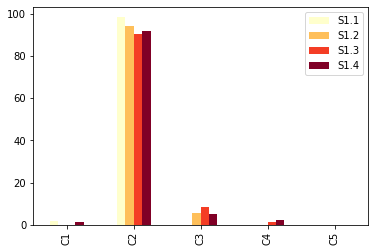

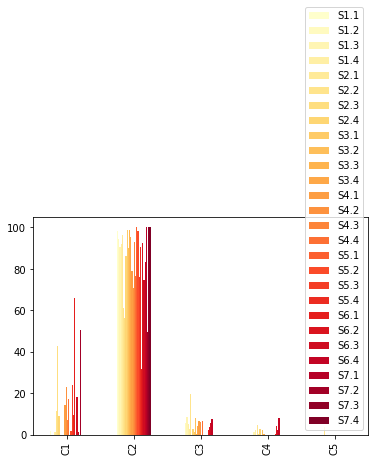

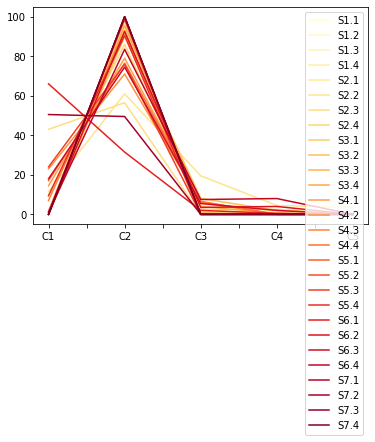

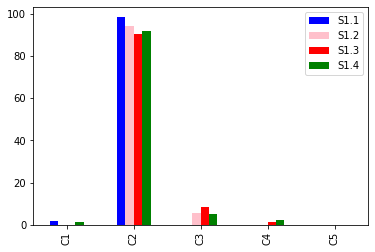

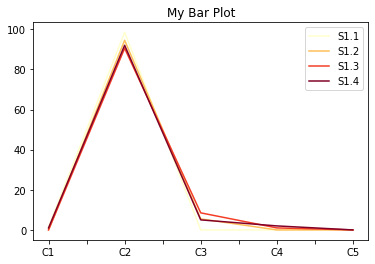

In [277]:
opti_sort, pessi_sort, dranking = electre_tri (d, repet)

opti_sort[['S1.1', 'S1.2','S1.3','S1.4']].plot(kind='bar', colormap='YlOrRd')
opti_sort.plot(kind='bar', colormap='YlOrRd')
opti_sort.plot(colormap='YlOrRd')
opti_sort[['S1.1', 'S1.2','S1.3','S1.4']].plot(kind='bar', color=['blue','pink','red','green'])
opti_sort[['S1.1', 'S1.2','S1.3','S1.4']].plot(colormap='YlOrRd')
plt.title('My Bar Plot')
plt.show()

#pessi_sort.to_csv('pessimistic_sorting.csv')
#opti_sort.to_csv('optimistic_sorting.csv')

#print(opti_sort)
#print(pessi_sort)